In [1]:
import pandas as pd
import sqlite3
from src.Benchmarking.BenchmarkingService import BenchmarkingService
from src.Benchmarking.Benchmarking import Benchmarking
import pickle
from stable_baselines3 import PPO
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')


2023-08-19 22:41:07.319359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
pd.set_option('display.float_format', '{:.5f}'.format)  # Customize the format as needed

In [352]:
frame.head()

,Unnamed: 0,pair,Wealth NEAT,Wealth STATIC,Wealth DRL,CAGR NEAT,CAGR STATIC,CAGR DRL,ASR NEAT,ASR STATIC,ASR DRL,# Trades NEAT,# Trades STATIC,# Trades DRL,TR NEAT,TR STATIC,TR DRL
0,0,#11295,1.042386e+06,1.073217e+06,9.990744e+05,0.004243,7.233515e-03,-0.000248,0.026297,0.379161,-4.405835,894,44,13,0.042386,7.321736e-02,-0.000926
1,1,#62369,1.021579e+06,1.005134e+06,1.003858e+06,0.002180,5.225184e-04,0.001021,-0.291542,-2.152628,-2.064156,139,15,25,0.021579,5.134488e-03,0.003858
2,2,#29109,1.020960e+06,9.972572e+05,1.025030e+06,0.002118,-2.801179e-04,0.003833,-0.314021,-1.272766,-0.024441,188,17,121,0.020960,-2.742849e-03,0.025030
3,3,#15698,1.004904e+06,9.999993e+05,1.004706e+06,0.000499,-7.328759e-08,0.006279,-1.449148,-1.556114,0.511186,239,3,31,0.004904,-7.185000e-07,0.004706
4,4,#25331,1.005022e+06,1.001335e+06,9.990234e+05,0.000511,1.360939e-04,-0.000124,-1.363078,-1.430261,-1.611284,408,3,122,0.005022,1.335043e-03,-0.000977


In [356]:
1e6 - 715277.77208

284722.22792

In [359]:
frame.sort_values(by='TR NEAT').head()

,Unnamed: 0,pair,Wealth NEAT,Wealth STATIC,Wealth DRL,CAGR NEAT,CAGR STATIC,CAGR DRL,ASR NEAT,ASR STATIC,ASR DRL,# Trades NEAT,# Trades STATIC,# Trades DRL,TR NEAT,TR STATIC,TR DRL
26,26,#27187,715277.77208,-5.715013e+04,1.006405e+06,-0.033601,-0.935424,0.001109,-0.081697,-0.399086,-0.996068,326,28,9,-0.284722,-1.057150,0.006405
55,55,#89091,732065.00521,1.061310e+06,1.063719e+06,-0.031312,0.006088,0.010204,-0.537053,0.071551,0.183521,445,16,58,-0.267935,0.061310,0.063719
19,19,#90213,809187.19820,8.877923e+05,1.132999e+06,-0.021365,-0.012066,0.028914,-0.115282,-0.077404,0.483698,294,65,75,-0.190813,-0.112208,0.132999
17,17,#75480,825714.65190,1.108440e+06,8.598466e+05,-0.019344,0.010557,-0.032400,-0.052231,0.114385,-0.459863,503,78,32,-0.174285,0.108440,-0.140153
39,39,#63136,850983.50000,1.031018e+06,1.087655e+06,-0.016324,0.003121,0.010553,-0.437006,-0.002641,0.213555,269,12,272,-0.149016,0.031018,0.087655


In [347]:
frame_.sort_values(by='Bucket', ascending=True).head(50)

,NEAT,DRL,STATIC,pair,Bucket,area_x
30,0.077010,0.030797,1.068795e-01,#97840,1,Lumber futures (different maturities)
31,0.111387,0.073448,1.531790e-01,#90207,1,Lumber futures (different maturities)
34,0.100222,0.031116,1.511654e-01,#96894,1,Lumber futures (different maturities)
35,-0.013555,0.000866,2.635336e-02,#66464,1,Lumber futures (different maturities)
36,0.284579,-0.013057,1.544695e-01,#33055,1,Lumber futures (different maturities)
38,0.022776,0.009550,1.338238e-02,#40812,1,Corn futures (different maturity)
39,-0.016324,0.010553,3.120618e-03,#63136,1,Corn futures (different maturity)
40,0.009646,-0.012828,2.315314e-02,#13311,1,Corn futures (different maturity)
41,0.017342,0.003624,8.449299e-03,#92619,1,Corn futures (different maturity)
32,0.148698,0.025713,1.610112e-01,#61696,1,Lumber futures (different maturities)


In [340]:
mapping_ = mapping[['pair', 'case', 'area_x']]
mapping_ = mapping.rename(columns={'case': 'Bucket'})
frame_ = frame.merge(mapping_, on='pair')[['CAGR NEAT', 'CAGR DRL', 'CAGR STATIC', 'pair', 'Bucket', 'area_x']]
#frame_ = remove_outliers(frame_, ['CAGR NEAT', 'CAGR STATIC', 'CAGR DRL'], 3 )
frame_ = frame_.rename(columns={'CAGR NEAT':'NEAT', 'CAGR DRL': 'DRL', 'CAGR STATIC': 'STATIC'})


In [341]:
melted_frame_ = pd.melt(frame_, value_vars=['NEAT', 'DRL', 'STATIC'],
                    var_name='Model', value_name='CAGR', id_vars=['area_x', 'Bucket'])


In [342]:
import numpy as np
melted_frame_['area_x'] = np.where(melted_frame_['area_x'] == 'Lumber futures (different maturities)', 'Lumber futures', 'Other')
melted_frame_ = melted_frame_.rename(columns={'area_x': 'Set of pairs'})
melted_frame_


,Set of pairs,Bucket,Model,CAGR
0,Other,2,NEAT,0.004243
1,Other,2,NEAT,0.002180
2,Other,2,NEAT,0.002118
3,Other,2,NEAT,0.000499
4,Other,2,NEAT,0.000511
...,...,...,...,...
178,Other,2,STATIC,-0.004256
179,Other,1,STATIC,0.000011
180,Other,2,STATIC,0.009605
181,Other,2,STATIC,0.005269


Text(0.5, 1.0, 'CAGR of different buckets for NEAT and the benchmark models')

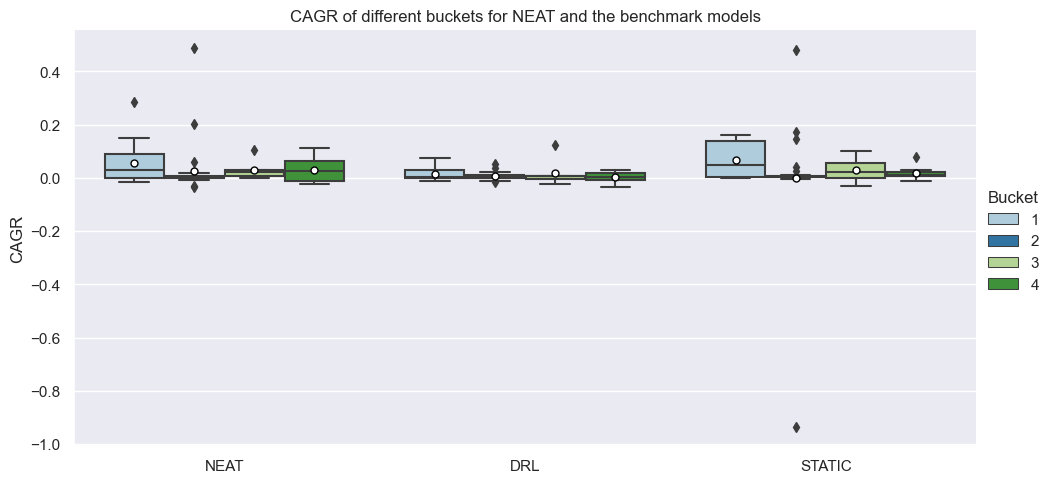

In [343]:
ax = sns.catplot(data=melted_frame_, x="Model", y="CAGR", legend='brief', palette=sns.color_palette("Paired", 4),  kind='box', hue='Bucket', height=5, aspect=2, showmeans=True, meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':5 } )

plt.xlabel('')

plt.title('CAGR of different buckets for NEAT and the benchmark models')


Text(0.5, 1.0, 'Performance of pairs involving lumber futures with differing expiry dates across models')

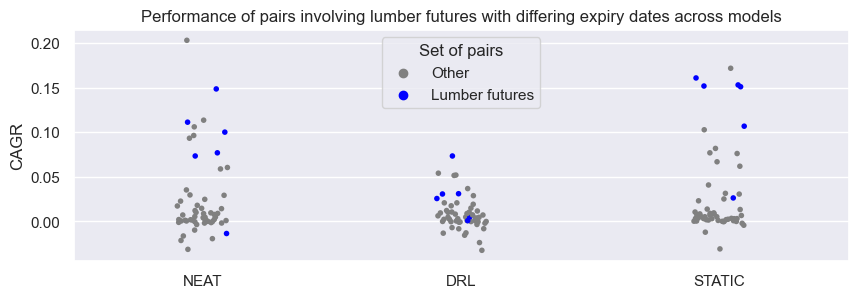

In [304]:
highlighted_categories = ['Lumber futures (different maturities)']

# Create a custom color palette
color_palette = {
    'Other': 'grey',    # Customize the color for 'High' category
    'Lumber futures': 'blue', # Customize the color for 'Medium' category
}
sns.stripplot(data=melted_frame_, x="Model", y="CAGR", hue='Set of pairs', palette=color_palette, legend='brief', size=4, jitter=True)
plt.xlabel('')
plt.title('Performance of pairs involving lumber futures with differing expiry dates across models')

In [339]:
mapping_ = mapping[['pair', 'case', 'area_x']]
mapping_ = mapping.rename(columns={'case': 'Bucket'})
frame_ = frame.merge(mapping_, on='pair')[['ASR NEAT', 'ASR DRL', 'ASR STATIC', 'pair', 'Bucket', 'area_x']]
#frame_ = remove_outliers(frame_, ['ASR NEAT', 'ASR STATIC', 'ASR DRL'], 3 )
frame_ = frame_.rename(columns={'ASR NEAT':'NEAT', 'ASR DRL': 'DRL', 'ASR STATIC': 'STATIC'})


In [334]:
ax = sns.catplot(data=melted_frame_, x="Model", y="ASR", legend='brief', palette=sns.color_palette("Paired", 4),  kind='box', hue='Bucket', height=5, aspect=2, showmeans=True, meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':5 })

plt.xlabel('')

plt.title('ASR of different buckets for NEAT and the benchmark models')


ValueError: Could not interpret input 'ASR'

In [129]:
frame = pd.read_csv('comparison_frame_test_set.csv')

In [45]:
query = f'SELECT * FROM final_pairs_mapping'

with sqlite3.connect('src/Data/pairs_trading.db') as conn:
    final_mapping = pd.read_sql(query, conn)

query = f'SELECT * FROM identification'

with sqlite3.connect('src/Data/pairs_trading.db') as conn:
    identification = pd.read_sql(query, conn)

query = f'SELECT * FROM codes_mapping'

with sqlite3.connect('src/Data/pairs_trading.db') as conn:
    codes_mapping = pd.read_sql(query, conn)

query = f'SELECT * FROM pairs_mapping'

with sqlite3.connect('src/Data/pairs_trading.db') as conn:
    pre_mapping = pd.read_sql(query, conn)

In [64]:
all_instruments = set(list(pre_mapping['asset_1'].unique()) + list(pre_mapping['asset_2'].unique()))

In [67]:
print(codes_mapping[codes_mapping.Code.isin(all_instruments)][['Code', 'Name']].to_latex(index=False))

\begin{tabular}{ll}
\toprule
       Code &                                                        Name \\
\midrule
5769UJ(MPD) &               ISRAEL 1993 ZERO 15/09/23 2-Z - DEFAULT PRICE \\
5769XN(MPD) &               ISRAEL 1994 ZERO 01/11/24 5-Z - DEFAULT PRICE \\
5769VK(MPD) &               ISRAEL 1994 ZERO 15/02/24 3-Z - DEFAULT PRICE \\
5769XM(MPD) &               ISRAEL 1994 ZERO 15/05/24 5-Z - DEFAULT PRICE \\
5769WK(MPD) &               ISRAEL 1994 ZERO 15/02/24 4-Z - DEFAULT PRICE \\
5769VJ(MPD) &               ISRAEL 1994 ZERO 15/08/23 3-Z - DEFAULT PRICE \\
5769WJ(MPD) &               ISRAEL 1994 ZERO 15/08/23 4-Z - DEFAULT PRICE \\
5873VV(MPD) &              ISRAEL 1997 ZERO 15/02/27 10-Z - DEFAULT PRICE \\
191525(MPD) &          US TREASURY PS PRCL STRIP 15/08/23 - DEFAULT PRICE \\
191527(MPD) &          US TREASURY CS CPN. STRIP 15/05/24 - DEFAULT PRICE \\
191197(MPD) &          US TREASURY CS CPN. STRIP 15/02/24 - DEFAULT PRICE \\
197913(MPD) &          US TREASURY CS 

/var/folders/h9/46y5f_kn7pn1c70409ybj6gw0000gn/T/ipykernel_7034/1166553242.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(codes_mapping[codes_mapping.Code.isin(all_instruments)][['Code', 'Name']].to_latex(index=False))


In [63]:
len(list(pre_mapping['asset_2'].unique()))

93

In [51]:
pd.set_option('display.max_colwidth', None)

df_data = pre_mapping

mapping_data = {'Code': ['A123', 'B456', 'C789', 'X111', 'Y222', 'Z333'],
                'Name': ['Name 1', 'Name 2', 'Name 3',
                                'Name X', 'Name Y', 'Name Z']}
df_mapping = pd.DataFrame(mapping_data)

df_mapping =codes_mapping.copy()
df_merged = df_data.merge(df_mapping, left_on='asset_1', right_on='Code', how='left')
df_merged.drop(columns=['Code'], inplace=True)  # Drop the Code column

df_merged.rename(columns={'Name': 'asset_1 Name'}, inplace=True)

df_merged = df_merged.merge(df_mapping, left_on='asset_2', right_on='Code', how='left')
df_merged.drop(columns=['Code'], inplace=True)

df_merged.rename(columns={'Name': 'asset_2 Name'}, inplace=True)
df_merged = df_merged[['pair','asset_1', 'asset_2', 'area', 'case']]
print(df_merged.to_latex(index=False))


\begin{tabular}{llllr}
\toprule
  pair &     asset\_1 &     asset\_2 &                                                                                                         area &  case \\
\midrule
\#11295 & 5769UJ(MPD) & 5769XN(MPD) &                                                  sovereign Bonds Izrael (Pairs combine different maturities) &     2 \\
\#62369 & 5769UJ(MPD) & 5769VK(MPD) &                                                  sovereign Bonds Izrael (Pairs combine different maturities) &     2 \\
\#53687 & 5769UJ(MPD) & 5769XM(MPD) &                                                  sovereign Bonds Izrael (Pairs combine different maturities) &     2 \\
\#29109 & 5769UJ(MPD) & 5769WK(MPD) &                                                  sovereign Bonds Izrael (Pairs combine different maturities) &     2 \\
\#15698 & 5769UJ(MPD) & 5769VJ(MPD) &                                                  sovereign Bonds Izrael (Pairs combine different maturities) &     2 \\
\#25331 & 

/var/folders/h9/46y5f_kn7pn1c70409ybj6gw0000gn/T/ipykernel_7034/1802014986.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_merged.to_latex(index=False))


In [37]:
df_merged.head()

,index,asset_1,asset_2,area_x,pair,case,date_min,date_max,na_count_asset_1,na_count_asset_2,act,coint,hurst,asset_1 Name,asset_2 Name
0,0,5769UJ(MPD),5769XN(MPD),Izraelian bonds (different maturities),#11295,2,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,16.857143,1.739834e-07,0.478440,ISRAEL 1993 ZERO 15/09/23 2-Z - DEFAULT PRICE,ISRAEL 1994 ZERO 01/11/24 5-Z - DEFAULT PRICE
1,1,5769UJ(MPD),5769VK(MPD),Izraelian bonds (different maturities),#62369,2,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,17.909091,2.128967e-04,0.448234,ISRAEL 1993 ZERO 15/09/23 2-Z - DEFAULT PRICE,ISRAEL 1994 ZERO 15/02/24 3-Z - DEFAULT PRICE
2,2,5769UJ(MPD),5769WK(MPD),Izraelian bonds (different maturities),#29109,2,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,19.591837,5.307093e-02,0.486527,ISRAEL 1993 ZERO 15/09/23 2-Z - DEFAULT PRICE,ISRAEL 1994 ZERO 15/02/24 4-Z - DEFAULT PRICE
3,3,5769UJ(MPD),5769VJ(MPD),Izraelian bonds (different maturities),#15698,2,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,64.333333,3.932817e-01,0.474082,ISRAEL 1993 ZERO 15/09/23 2-Z - DEFAULT PRICE,ISRAEL 1994 ZERO 15/08/23 3-Z - DEFAULT PRICE
4,4,5769UJ(MPD),5769WJ(MPD),Izraelian bonds (different maturities),#25331,2,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,49.052632,8.186762e-02,0.478927,ISRAEL 1993 ZERO 15/09/23 2-Z - DEFAULT PRICE,ISRAEL 1994 ZERO 15/08/23 4-Z - DEFAULT PRICE


In [33]:
final_mapping.drop(columns=['index', 'date_min', 'date_max', 'na_count_asset_1', 'na_count_asset_2', 'area_x']).head()#to_latex(index=False)

,asset_1,asset_2,pair,case,act,coint,hurst
0,5769UJ(MPD),5769XN(MPD),#11295,2,16.857143,1.739834e-07,0.478440
1,5769UJ(MPD),5769VK(MPD),#62369,2,17.909091,2.128967e-04,0.448234
2,5769UJ(MPD),5769WK(MPD),#29109,2,19.591837,5.307093e-02,0.486527
3,5769UJ(MPD),5769VJ(MPD),#15698,2,64.333333,3.932817e-01,0.474082
4,5769UJ(MPD),5769WJ(MPD),#25331,2,49.052632,8.186762e-02,0.478927


In [30]:
codes_mapping.head(50)

,Name,Code
0,ISRAEL 1993 ZERO 15/09/23 2-Z - DEFAULT PRICE,5769UJ(MPD)
1,ISRAEL 1994 ZERO 01/11/24 5-Z - DEFAULT PRICE,5769XN(MPD)
2,ISRAEL 1994 ZERO 15/02/24 3-Z - DEFAULT PRICE,5769VK(MPD)
3,ISRAEL 1994 ZERO 15/05/24 5-Z - DEFAULT PRICE,5769XM(MPD)
4,ISRAEL 1994 ZERO 15/02/24 4-Z - DEFAULT PRICE,5769WK(MPD)
5,ISRAEL 1994 ZERO 15/08/23 3-Z - DEFAULT PRICE,5769VJ(MPD)
6,ISRAEL 1994 ZERO 15/08/23 4-Z - DEFAULT PRICE,5769WJ(MPD)
7,ISRAEL 1994 ZERO 15/08/24 4-Z - DEFAULT PRICE,5769WL(MPD)
8,ISRAEL 1994 ZERO 15/11/23 5-Z - DEFAULT PRICE,5769XL(MPD)
9,ISRAEL 1995 ZERO 15/02/24 6-Z - DEFAULT PRICE,5770CX(MPD)


In [21]:
print(identification.drop(columns=['index', 'date_min', 'date_max', 'na_count_asset_1', 'na_count_asset_2', 'area']).to_latex(index=False))

\begin{tabular}{rrrll}
\toprule
       act &        coint &    hurst &   pair & selected \\
\midrule
 16.857143 & 1.739834e-07 & 0.478440 & \#11295 &      Yes \\
 17.909091 & 2.128967e-04 & 0.448234 & \#62369 &      Yes \\
 47.611111 & 7.765946e-01 & 0.554005 & \#53687 &       No \\
 19.591837 & 5.307093e-02 & 0.486527 & \#29109 &      Yes \\
 64.333333 & 3.932817e-01 & 0.474082 & \#15698 &      Yes \\
 49.052632 & 8.186762e-02 & 0.478927 & \#25331 &      Yes \\
 15.677966 & 5.068682e-03 & 0.505389 & \#48260 &      Yes \\
  4.000000 & 2.229759e-03 & 0.290905 & \#49850 &      Yes \\
  4.312775 & 4.249318e-02 & 0.289348 & \#99137 &      Yes \\
  9.120879 & 9.086320e-03 & 0.487236 & \#28211 &      Yes \\
  7.742857 & 1.985505e-02 & 0.440396 & \#75568 &      Yes \\
 15.529412 & 1.733697e-01 & 0.517633 & \#82282 &       No \\
 21.459459 & 1.627482e-01 & 0.533627 & \#33784 &       No \\
 14.400000 & 2.134278e-01 & 0.544163 & \#52442 &       No \\
 32.903226 & 0.000000e+00 & 0.440797 & \#1561

/var/folders/h9/46y5f_kn7pn1c70409ybj6gw0000gn/T/ipykernel_7034/302630183.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(identification.drop(columns=['index', 'date_min', 'date_max', 'na_count_asset_1', 'na_count_asset_2', 'area']).to_latex(index=False))


In [12]:
replacement = {0: 'No', 1: 'Yes'}

# Replace values in the 'column_name' column
identification['selected'] = identification['selected'].replace(replacement)

In [320]:
selected = list(final_mapping.pair.unique())
pre_mapping['selected'] = np.where(pre_mapping.pair.isin(selected), True,  False)
pre_mapping.groupby('case').selected.value_counts()

case  selected
1     True        18
      False       12
2     True        30
      False       27
3     True         6
      False        4
4     False        9
      True         7
Name: selected, dtype: int64

# Comparison

In [51]:
# Removing outliers
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        thres = mean+(n_std*sd)
        print(thres)

        df = df[abs((df[col].abs()) <= thres)]
        
    return df

In [103]:
plot_frame[['ASR DRL__', 'ASR DRL']].tail(50)

,ASR DRL__,ASR DRL
11,45.50000,1.68476
12,45.50000,1.35850
13,45.50000,-131.93988
14,45.50000,-1.43775
15,45.50000,-0.05282
16,45.50000,0.05904
17,45.50000,-0.45986
18,45.50000,0.25431
19,45.50000,0.48370
20,45.50000,-0.04570


In [4]:
plot_frame = frame.copy()
asr_columns = ['ASR NEAT', 'ASR DRL', 'ASR STATIC', 'CAGR NEAT', 'CAGR STATIC', 'CAGR DRL']
plot_frame = remove_outliers(plot_frame, asr_columns, 3)



Working on column: ASR NEAT
2.97661190375252
Working on column: ASR DRL
48.65984367555481
Working on column: ASR STATIC
2.4416829379678093
Working on column: CAGR NEAT
0.2839706961978363
Working on column: CAGR STATIC
0.47167230099977003
Working on column: CAGR DRL
0.08441986530529026


In [154]:
plot_frame.describe()


,Unnamed: 0,Wealth NEAT,Wealth STATIC,Wealth DRL,CAGR NEAT,CAGR STATIC,CAGR DRL,ASR NEAT,ASR STATIC,ASR DRL,# Trades NEAT,# Trades STATIC,# Trades DRL,TR NEAT,TR STATIC,TR DRL
count,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000,59.00000
mean,29.83051,2372777.78567,2322636.30305,1047419.67514,0.03724,0.02541,0.01006,0.24975,0.18380,-0.34329,468.06780,63.42373,88.62712,1.37278,1.32264,0.04742
std,17.56285,6332060.91190,6047786.34467,136904.17587,0.08224,0.14947,0.02407,0.76611,0.75263,1.62711,430.70891,43.51979,90.84506,6.33206,6.04779,0.13690
min,0.00000,715277.77208,-57150.12652,854158.08100,-0.03360,-0.93542,-0.03240,-1.44915,-2.15263,-6.82632,12.00000,3.00000,7.00000,-0.28472,-1.05715,-0.14584
25%,15.50000,1004962.81510,1016736.84550,999048.91375,0.00074,0.00225,-0.00019,-0.15375,-0.14206,-0.54798,211.50000,30.50000,30.00000,0.00496,0.01674,-0.00095
50%,30.00000,1079178.83600,1073217.35860,1015338.25000,0.00780,0.00750,0.00472,0.18543,0.11859,0.05522,353.00000,53.00000,58.00000,0.07918,0.07322,0.01534
75%,44.50000,1369260.00000,1561150.91260,1048484.86500,0.03254,0.05143,0.01359,0.56831,0.51301,0.56603,586.50000,98.50000,121.50000,0.36926,0.56115,0.04848
max,60.00000,48649368.66287,47296483.01400,1815670.02000,0.48622,0.48195,0.12367,2.50694,1.92953,1.68476,2266.00000,205.00000,522.00000,47.64937,46.29648,0.81567


Text(0.5, 1.0, 'Out-Of-Sample CAGR for all 61 traded pairs')

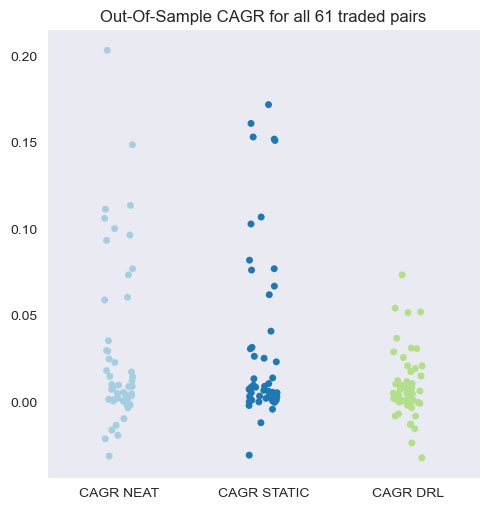

In [5]:

sns.catplot(data=plot_frame[['CAGR NEAT','CAGR STATIC', 'CAGR DRL']],palette="Paired", kind='strip',height=5, aspect=1, size=5)
plt.title('Out-Of-Sample CAGR for all 61 traded pairs')

Text(0.5, 1.0, 'Out-Of-Sample CAGR (Outlier-adjusted)')

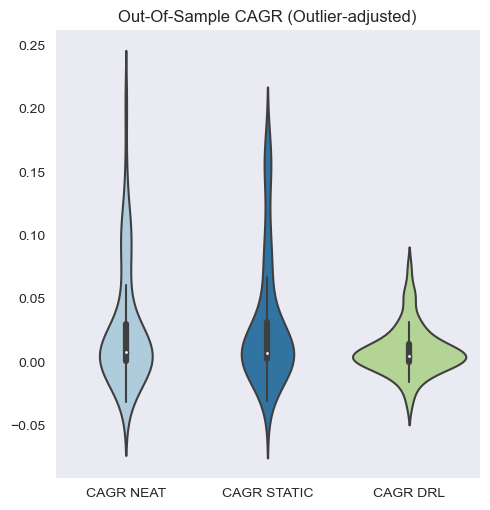

In [15]:
sns.catplot(data=plot_frame[['CAGR NEAT','CAGR STATIC', 'CAGR DRL']],palette="Paired", kind='violin')
plt.title('Out-Of-Sample CAGR (Outlier-adjusted)')

Text(0.5, 1.0, 'Out-Of-Sample ASR (Outlier-adjusted)')

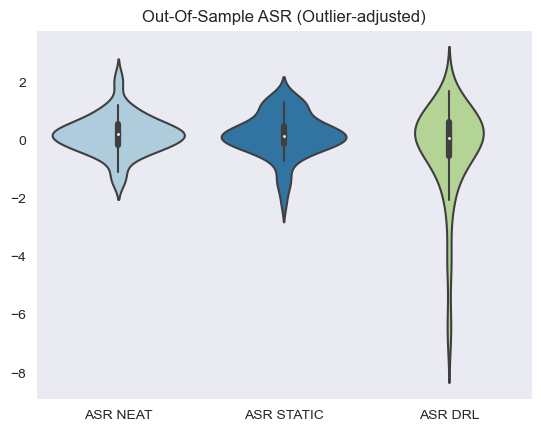

In [14]:
sns.violinplot(data=plot_frame[['ASR NEAT','ASR STATIC', 'ASR DRL']], palette="Paired",height=5, aspect=1)
plt.title('Out-Of-Sample ASR (Outlier-adjusted)')

<Axes: >

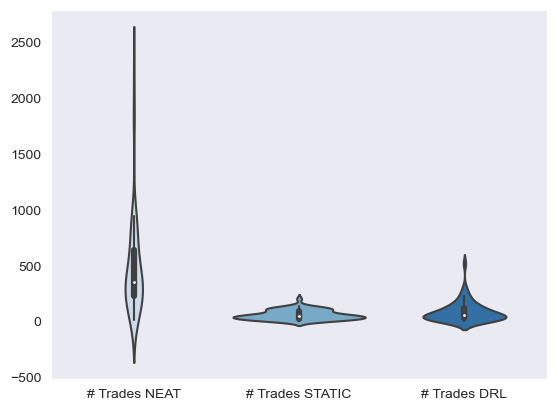

In [8]:
sns.violinplot(data=frame[['# Trades NEAT','# Trades STATIC', '# Trades DRL']], palette="Blues", showfliers=False)

In [69]:
query = f'SELECT * FROM final_pairs_mapping'

with sqlite3.connect('src/Data/pairs_trading.db') as conn:
    mapping = pd.read_sql(query, conn)

In [73]:
mapping.tail(25)

,index,asset_1,asset_2,area_x,pair,Unnamed: 4,date_min,date_max,na_count_asset_1,na_count_asset_2,act,coint,hurst
36,36,LUMRLF4(P),LUMRLF3(P),Lumber futures (different maturities),#33055,56,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,11.627907,0.015742,0.463959
37,37,NKCCS21(PS),NKTC.01(PS),CSCE Coffee & NYM Coffee,#69262,64,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,17.526316,0.000000,0.306880
38,38,CCFCS00(PS),CCFCS30(PS),Corn futures (different maturity),#40812,67,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,23.589744,0.077927,0.492433
39,39,CCFCS00(PS),CCFCS20(PS),Corn futures (different maturity),#63136,68,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,31.137931,0.016515,0.486749
40,40,CCFCS00(PS),CCFCS60(PS),Corn futures (different maturity),#13311,70,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,12.000000,0.106906,0.456266
41,41,CCFCS00(PS),CCFCS70(PS),Corn futures (different maturity),#92619,71,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,10.723404,0.000154,0.453348
42,42,TRBBR13(RI),TRBBR37(RI),RF BPAM ALL bonds (different maturity),#84037,72,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,37.375000,0.009926,0.626447
43,43,TRBBR13(RI),TRBBR31(RI),RF BPAM ALL bonds (different maturity),#87707,73,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,26.419355,0.303017,0.492891
44,44,TRBBR37(RI),TRBBR31(RI),RF BPAM ALL bonds (different maturity),#14614,74,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,40.227273,0.028978,0.575558
45,45,TRBBF13(RI),TRBBF37(RI),RF BPAM CORP FIN bonds (different maturity),#80319,81,2009-01-02 00:00:00,2012-12-31 00:00:00,0,0,196.000000,0.021313,0.727278


In [17]:
print(BenchmarkingService.compute_summary_ranking(frame).to_latex())

/Users/PJA/Documents/Education/Quantitative Finance/MasterThesis/Code/NeatTrader/src/Benchmarking/BenchmarkingService.py:251: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking_df = ranking_df.append({
/Users/PJA/Documents/Education/Quantitative Finance/MasterThesis/Code/NeatTrader/src/Benchmarking/BenchmarkingService.py:251: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking_df = ranking_df.append({
/Users/PJA/Documents/Education/Quantitative Finance/MasterThesis/Code/NeatTrader/src/Benchmarking/BenchmarkingService.py:251: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking_df = ranking_df.append({
/Users/PJA/Documents/Education/Quantitative Finance/MasterThesis/Code/NeatTrader/src/Benchmarking/BenchmarkingService.

\begin{tabular}{lrrr}
\toprule
{} &  Best &  Second &  Third \\
\midrule
Wealth DRL    &     8 &      15 &     38 \\
Wealth NEAT   &    26 &      20 &     15 \\
Wealth STATIC &    27 &      26 &      8 \\
\bottomrule
\end{tabular}



# Visuals for each model


## Load Data 


In [40]:
mapping.head()

NameError: name 'mapping' is not defined

In [2]:
pair = '#33055'	
query = f'SELECT * FROM test_pairs WHERE pair = "{pair}" ORDER BY Date'
with sqlite3.connect('src/Data/pairs_trading.db') as conn:
    test = pd.read_sql(query, conn)

query = f'SELECT * FROM training_pairs WHERE pair = "{pair}" ORDER BY Date'
with sqlite3.connect('src/Data/pairs_trading.db') as conn:
    train = pd.read_sql(query, conn).drop(columns='pair')

network = f'src/Output/nets/net_{pair}.pkl'
stats = f'src/Output/stats/stats_{pair}.pkl'


## Run the network created by NEAT

In [69]:
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2018-08-31')
date_range = [start_date, end_date]

In [3]:
benchmarking = BenchmarkingService(test)
#model_non_linear = PPO.load(f'src/Benchmarking/trained_benchmark_models/model_{pair}')
benchmarking.run_backtest_neat(network, stats)
# benchmarking.run_backtest_static()
# benchmarking.run_back_test_drl(model_non_linear)


In [365]:
benchmarking.env_static.portfolio.get_portfolio_info().tail()


,asset_1,price_asset_1,asset_2,price_asset_2,cash,portfolio_value,exposure,action,type
Date,,,,,,,,,
2018-08-27 00:00:00,-4378,508.3899,2798,523.5898,931890.93768,171164.21588,-1,-1,hold
2018-08-28 00:00:00,-4378,512.9099,2798,528.1099,931890.93768,164022.89568,-1,-1,hold
2018-08-29 00:00:00,-4378,548.8999,2798,566.6099,931890.93768,114181.67568,-1,-1,hold
2018-08-30 00:00:00,-4378,589.0698,2798,616.4700,931890.93768,77826.41328,-1,-1,hold
2018-08-31 00:00:00,-4378,664.2798,2798,685.9099,931890.93768,-57150.12652,-1,-1,hold


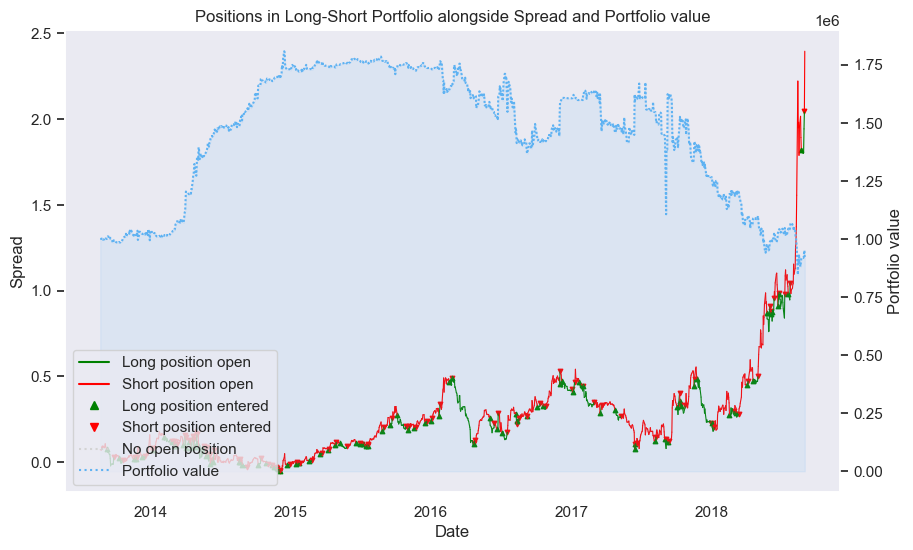

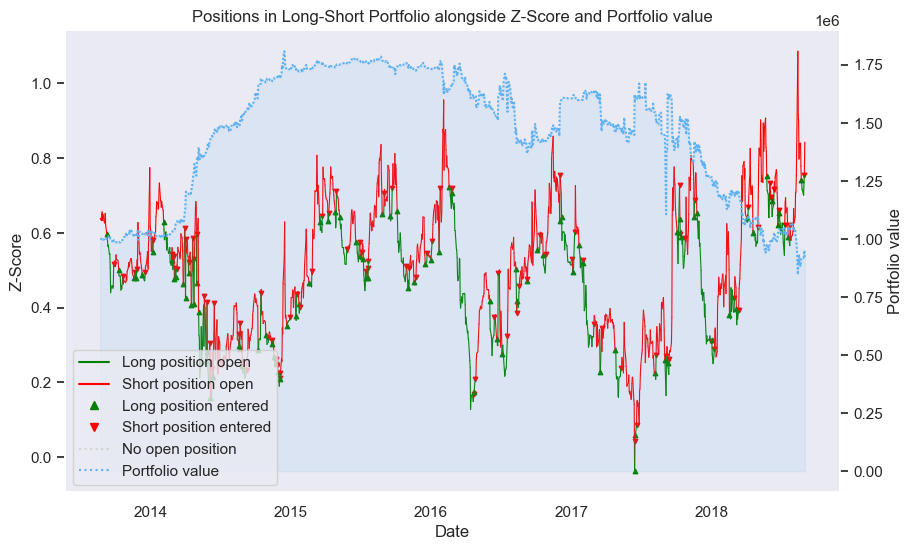

In [371]:
benchmarking.plot_neat_portfolio_info(date_range=date_range)

In [24]:
benchmarking.env_drl.portfolio.get_portfolio_info().tail(50)

,asset_1,price_asset_1,asset_2,price_asset_2,cash,portfolio_value,exposure,action,type
Date,,,,,,,,,
2023-03-23 00:00:00,0,70.12,0,75.91,1000000,1000000.0,0,0,hold
2023-03-24 00:00:00,0,69.41,0,74.99,1000000,1000000.0,0,0,hold
2023-03-27 00:00:00,0,72.93,0,78.12,1000000,1000000.0,0,0,hold
2023-03-28 00:00:00,0,73.34,0,78.65,1000000,1000000.0,0,0,hold
2023-03-29 00:00:00,0,73.12,0,78.28,1000000,1000000.0,0,0,hold
2023-03-30 00:00:00,0,74.49,0,79.27,1000000,1000000.0,0,0,hold
2023-03-31 00:00:00,0,75.80,0,79.77,1000000,1000000.0,0,0,hold
2023-04-03 00:00:00,0,80.44,0,84.93,1000000,1000000.0,0,0,hold
2023-04-04 00:00:00,0,80.72,0,84.94,1000000,1000000.0,0,0,hold


In [9]:
import numpy as np
float(1e-7)


1e-07

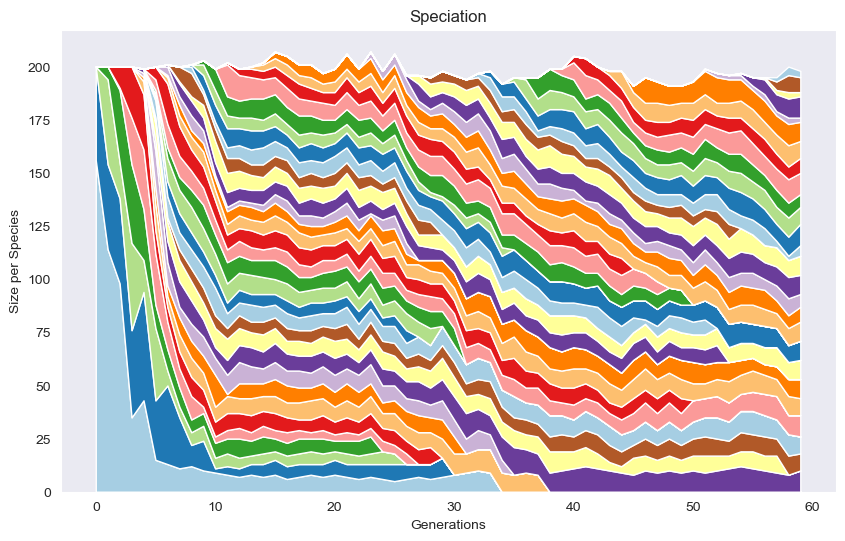

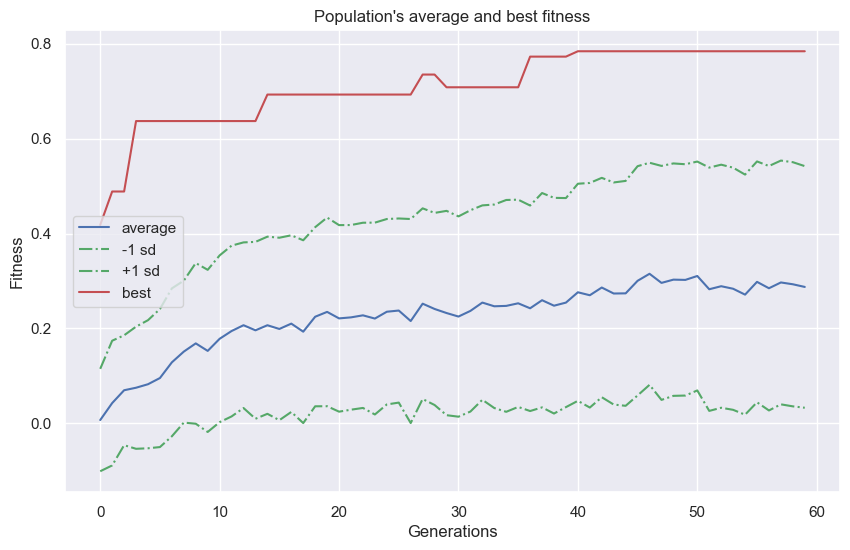

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

benchmarking.generate_visuals_neat() 

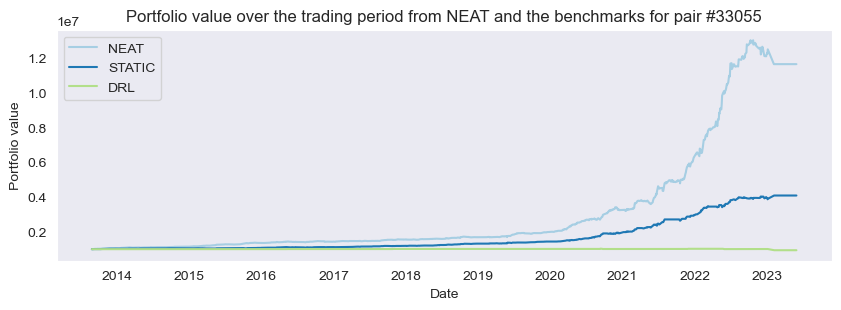

In [4]:
plt.rcParams['figure.figsize'] = (10, 3)

benchmarking.plot_wealth_comparison()
